In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('titanic_train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.isnull()
# Sometimes,data is missign in columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

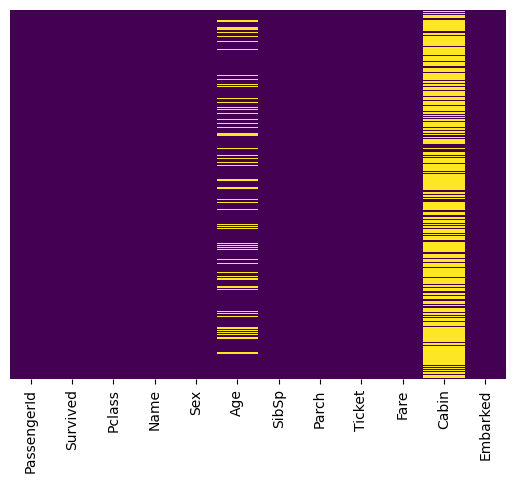

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# To see which data is missing the most,we'll create a heatmap to see the boxes that are null(empty)

In [21]:
sns.set_style('whitegrid')
# We will now draw different graphs to see which data are more relevant 

<Axes: xlabel='Survived', ylabel='count'>

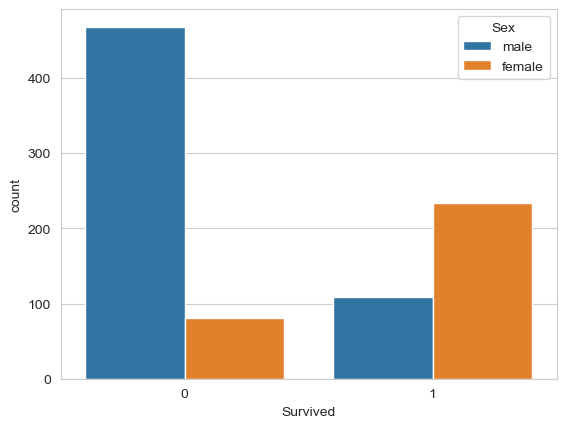

In [35]:
sns.countplot(x='Survived',data=df,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

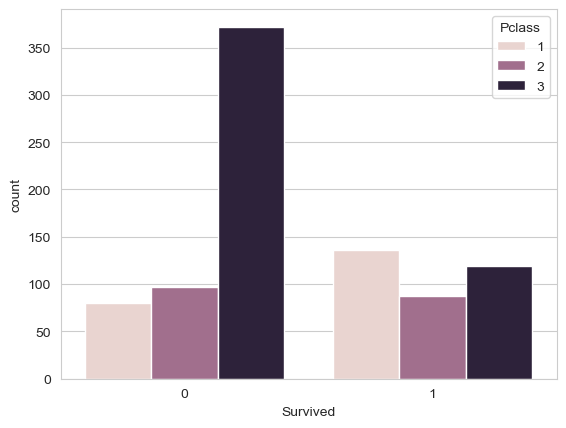

In [27]:
sns.countplot(x='Survived',data=df,hue='Pclass')

<Axes: xlabel='Age', ylabel='Count'>

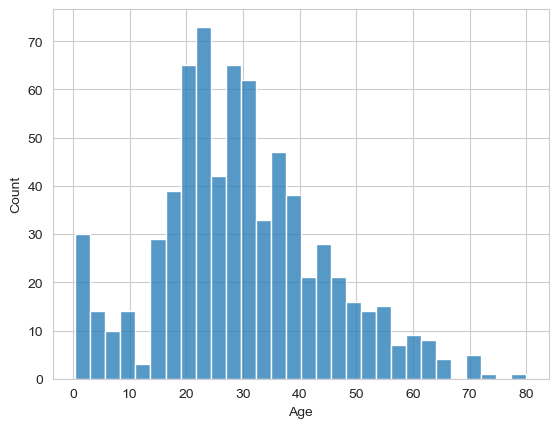

In [31]:
sns.histplot(df['Age'].dropna(),bins=30)
# We can see that average age of survival is 20

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

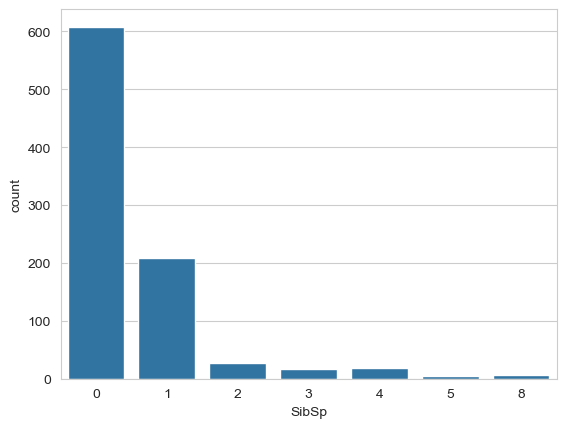

In [39]:
sns.countplot(x='SibSp',data=df)

In [41]:
# From all the graphs above, we're taking an idea of what type of people survived and what columns are important

# Clean Data

In [45]:
# We'll fill the boxes of missing age with the mean age of people but we'' do this according to their passenger classes'

<Axes: xlabel='Pclass', ylabel='Age'>

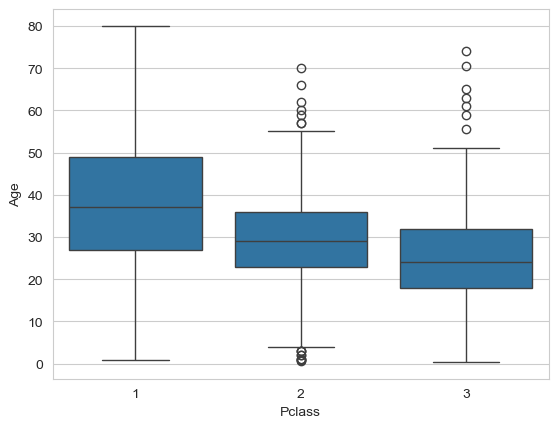

In [47]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [49]:
def impute_age(cols):
    age=cols[0]
    Pclass=cols[1]
    if pd.isnull(age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [51]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Sayuj Gupta\AppData\Local\Temp\ipykernel_73780\1751089453.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
C:\Users\Sayuj Gupta\AppData\Local\Temp\ipykernel_73780\1751089453.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

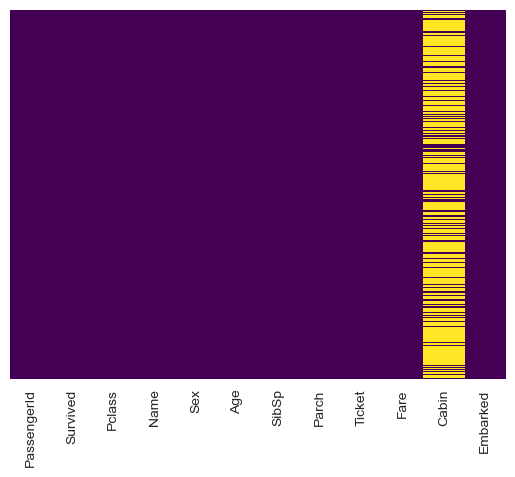

In [53]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Now we can see that the age column has been completely filled

In [55]:
# We could've filled the cabin column with some values but it is better to drop it as too much data is missing

In [57]:
df.drop('Cabin',axis=1,inplace=True)

<Axes: >

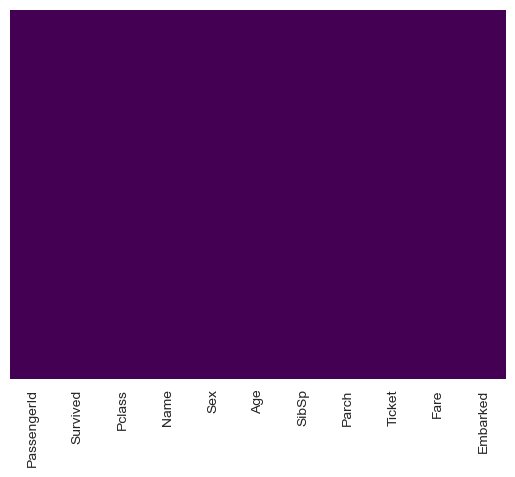

In [59]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
df.dropna(inplace=True)

In [63]:
# Now we'll have to convert categorical columns into dummy variable i.e. 0 or 1

In [71]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
# If we hadn't done drop_first then there would be 2 cols , one of female and one of male, which would confuse the algorithm
# Now we have only 1 col of male,and it is obvious that if false on male then female

In [73]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [75]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [77]:
df=pd.concat([df,sex,embark],axis=1)

In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,False,False


In [92]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [94]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,24.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


# Train

In [98]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [100]:
X=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'	]]
Y=df['Survived']

In [106]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.9,random_state=101)

In [142]:
from sklearn.linear_model import LogisticRegression 

In [144]:
logmodel=LogisticRegression()

In [146]:
logmodel.fit(x_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
predictions=logmodel.predict(x_test)

In [152]:
from sklearn.metrics import classification_report